<a href="https://colab.research.google.com/github/hochi57/KU_DFC/blob/master/%5BKU%5D_NLP_Final_Project_Korean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글드라이브에 러닝 파일 올려 두고
# 구글드라이브 마운팅 하기

from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
# 러닝 파일 확인하기

!ls /content/gdrive/My\ Drive/DFC/인공지능과자연어처리

friends_dev.json   friends_train.json  ratings_train.txt
friends_test.json  ratings_test.txt    ratings.txt


In [ ]:
# 1) Raw Data 이해

import pandas as pd
import numpy as np

file_path_1 = '/content/gdrive/My Drive/DFC/인공지능과자연어처리/ratings_train.txt'
file_path_2 = '/content/gdrive/My Drive/DFC/인공지능과자연어처리/ratings_test.txt'

train_data = pd.read_table(file_path_1)
test_data = pd.read_table(file_path_2)

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 
     |████████████████████████████████| 3.6MB 45.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
# 한글 폰트를 위한 작업 먼저하기
%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 한글 반영하는 폰트 찾아보기

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

print('-------------------')
nanum_font

sys_font number: 48
nanum_font number: 31
-------------------


['/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/f

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
# 한글 폰트로 나눔고딕 설정

# 폰트 위치
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 한글 폰드의 '-'인식을 명확히 하기 위해
plt.rc('axes', unicode_minus=False)

In [ ]:
# 새로운 것으로 폰트를 설정함
fm._rebuild()

In [ ]:
import pandas as pd

import re

from konlpy.tag import Okt

import nltk 
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer

from collections import Counter

import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
 # 데이터의 구조 확인하기

 # 데이터 갯수
print("학습 데이터", len(train_data))
print("테스트 데이터", len(test_data))
print('-------------------')
 # 테이블 형식
print(train_data[:5])
print('-------------------')
print(test_data[:5])
print('-------------------')

학습 데이터 149995
테스트 데이터 49997
-------------------
         id                                           document  label
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1
-------------------
        id                                   document  label
0  6270596                                        굳 ㅋ      1
1  9274899                                                 0
2  8544678           뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아      0
3  6825595                  지루하지는 않은데 완전 막장임 돈주고 보기에는      0
4  6723715  만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠      0
-------------------


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


   label  count
0      0  75173
1      1  74827


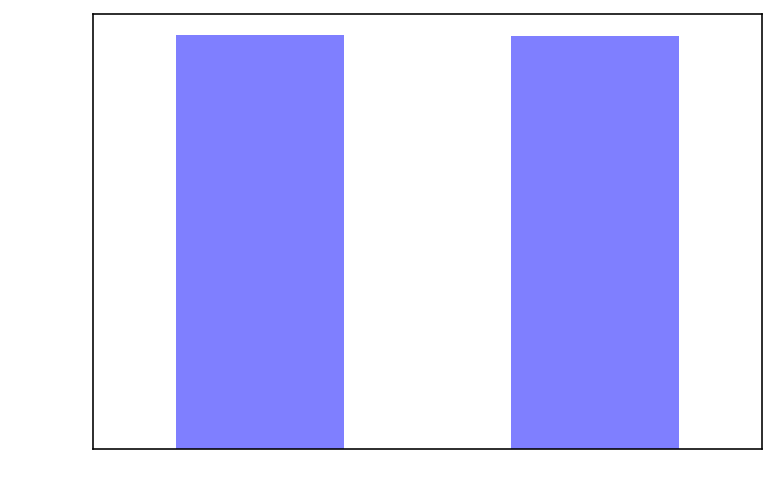

-------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


각 레이블에 대한 빈도수:
[[    0     1]
 [75173 74827]]


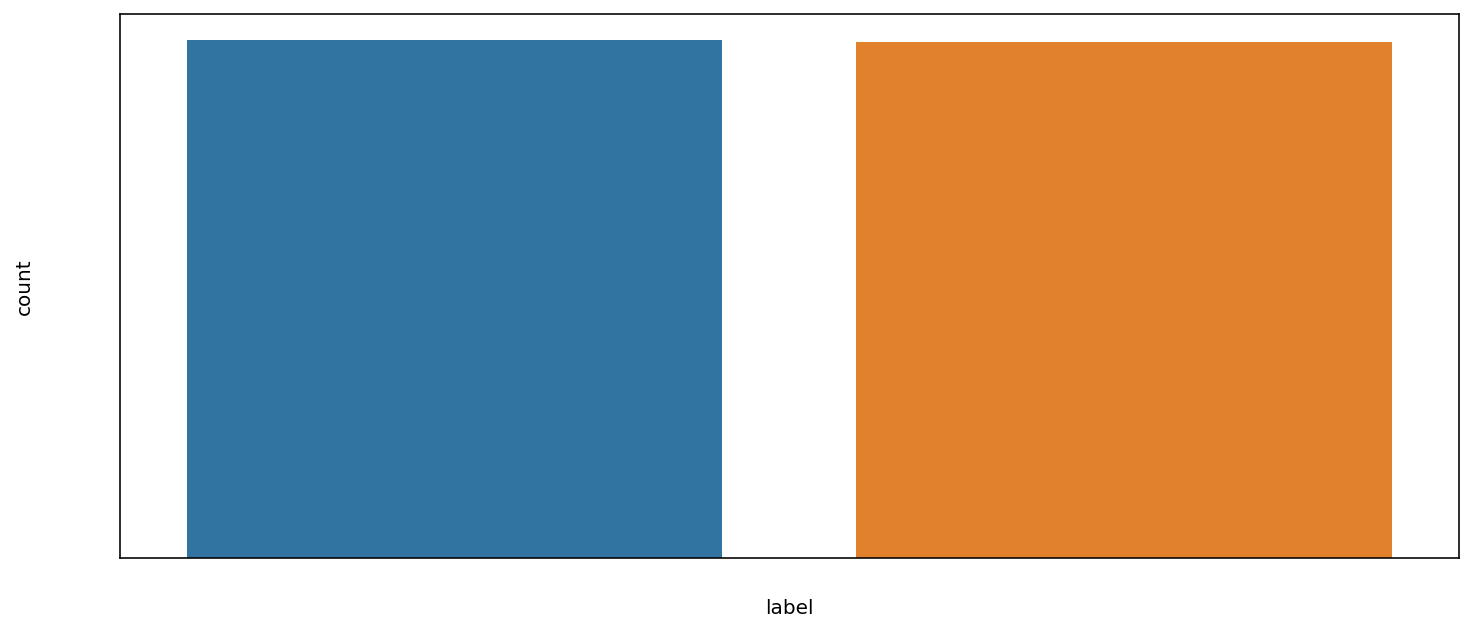

-------------------


In [ ]:
 # 레이블 분포 확인하기

print(train_data.groupby('label').size().reset_index(name='count'))
train_data['label'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
plt.tick_params(colors='white')
plt.show()

print('-------------------')

import seaborn as sns

unique_elements, counts_elements = np.unique(train_data['label'], return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(train_data['label'])
plt.tick_params(colors='white')
plt.show()

print('-------------------')

In [ ]:
 # null 데이터 확인
print("NA 데이터 여부:",train_data.isnull().values.any())
print(train_data.loc[train_data.document.isnull()])

NA 데이터 여부: True
             id document  label
25857   2172111      NaN      1
55737   6369843      NaN      1
110014  1034280      NaN      0
126782  5942978      NaN      0
140721  1034283      NaN      0


In [ ]:
 # null 전처리
train_data = train_data.dropna(how='any')
print("NA 데이터 여부:", train_data.isnull().values.any())
print("사용 가능한 데이터:", len(train_data))

NA 데이터 여부: False
사용 가능한 데이터: 149995


In [ ]:
# 영어 전처리
eng_sample_test = 'do!!! you expect... people~ to~ readt the FAQ, etc. and actually accept hard~! atheism?@@'
re.sub(r'[^a-zA-Z ]', '', eng_sample_test)

'do you expect people to readt the FAQ etc and actually accept hard atheism'

In [ ]:
# 한글 전처리
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

In [ ]:
# 전처리 샘플 확인
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
# 한글 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 한글 형태소 분석기
okt = Okt()
kor_sample_test = '사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보기만 했던 커스틴 던스트가 이렇게 아름다웠었다니'
okt.morphs(kor_sample_test, stem=True)

['사이',
 '몬페',
 '그',
 '의',
 '익살스럽다',
 '연기',
 '가',
 '돋보이다',
 '영화',
 '스파이더맨',
 '에서',
 '늙다',
 '보기',
 '만',
 '하다',
 '커스틴',
 '던스트',
 '가',
 '이렇게',
 '아름답다']

In [ ]:
# 학습데이터 적용
X_train=[]
train_word_list = []
for sentence in train_data['document']:
  
  temp_X = []
  temp_X=okt.morphs(sentence, stem=True) # 토큰화
  temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거

  X_train.append(temp_X)
  train_word_list.extend(temp_X)

In [ ]:
# 토큰화 샘플 확인
print(X_train[:3])
print(train_word_list[:10])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]
['아', '더빙', '진짜', '짜증나다', '목소리', '흠', '포스터', '보고', '초딩', '영화']


-------------------
<class 'numpy.ndarray'>
(800, 800, 3)
-------------------


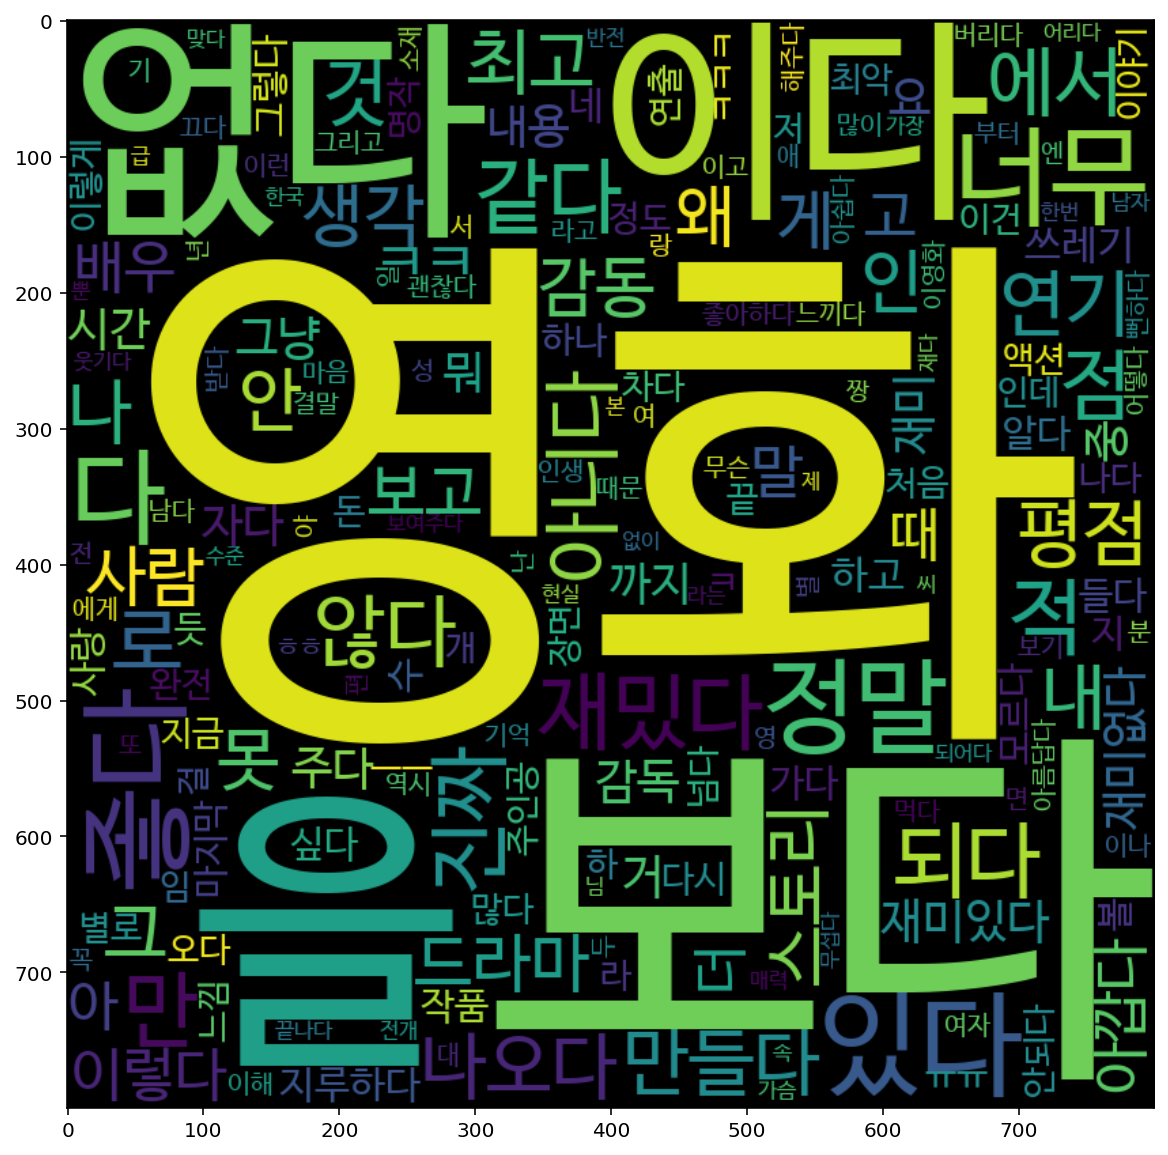

In [ ]:
# 토큰화 시각화
count = Counter(train_word_list)
words = dict(count.most_common())

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
    stopwords = STOPWORDS,
    font_path = font_path,
    background_color = 'black',
    width = 800,
    height = 800
)

wordcloud = wordcloud.generate_from_frequencies(words)

array = wordcloud.to_array()

print('-------------------')
print(type(array))
print(array.shape)
print('-------------------')
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()

In [ ]:
# 테스트데이터 동일 과정 반복
test_data = test_data.dropna(how='any')
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

X_test=[]
for sentence in test_data['document']:
  temp_X = []
  temp_X=okt.morphs(sentence, stem=True) # 토큰화
  temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

In [ ]:
# 자연어 단어들을 정수 인코딩
#상위 35,000개의 단어만 보존
max_words = 35000
tokenizer = Tokenizer(num_words=max_words)

# 데이터 정수 인코딩
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# 정수 인코딩 됨을 확인
print(X_train[:3])
print(X_test[:3])

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    50   457    16   260   660]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0   919   459    41   599     1
    214  1455    24   965   676    19]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   386  2452
  25024  2319  5676     2   221     9]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0 644  87]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  59 164  25 429  19  20 297 882  46 785  18]]


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


리뷰의 최대 길이:  69
리뷰의 평균 길이:  10.64700156671889
-------------------


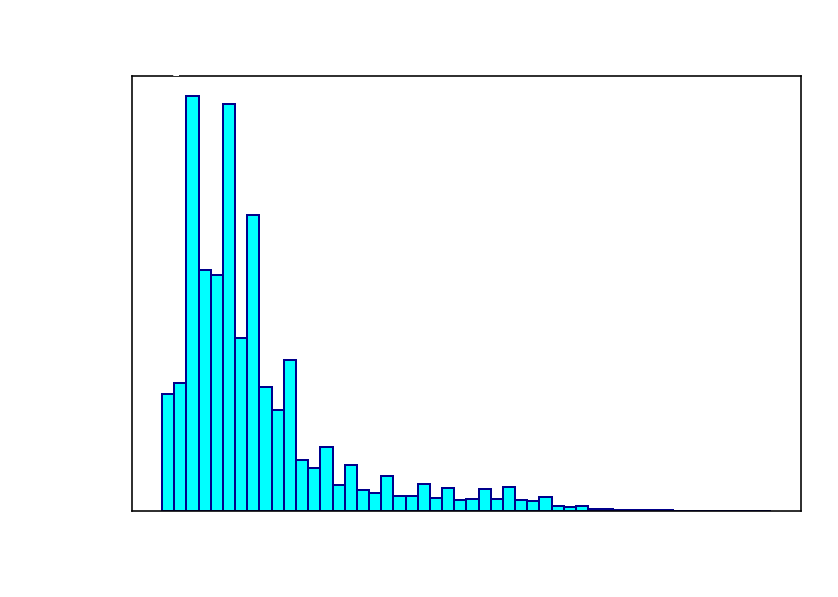

In [ ]:
# 인풋데이터 분포
print("리뷰의 최대 길이: ", max(len(i) for i in X_train))
print("리뷰의 평균 길이: ", sum(map(len, X_train)) / len(X_train))
print('-------------------')

plt.hist([len(i) for i in X_train], bins=50, color='cyan', edgecolor ='darkblue')

plt.title('Input data distribution', color='white', fontsize=32)
plt.xlabel('length of Data', color='white', fontsize=16)
plt.ylabel('number of Data', color='white', fontsize=16)
plt.tick_params(colors='white')

plt.show()

In [ ]:
# 인풋데이터 조정
# LSTM에 넣기 위해서는 인풋 데이터 피쳐 크기를 정해야 함
# 30으로 정함
max_len = 30
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
# 학습을 위한 Y값 지정
y_train=np.array(train_data['label'])
y_test=np.array(test_data['label'])

In [ ]:
# 다행히 해당 데이터의 Label은 0, 1로 'binary'이자 '정수'
# one hot encoding 할 필요 없음
print(y_train)
print(y_test)

[0 1 0 ... 0 1 0]
[1 0 0 ... 0 0 0]


In [ ]:
# LSTM
# Train으로 리뷰와 감성사이의 패턴 학습하고
# Test에 패턴 척용

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential() # 사용할 모델
model.add(Embedding(max_words, 120)) # 인풋(문장=패딩을 통해 300단어로 맞추었음, 피쳐=임의로 120개로 설정) 인베딩
model.add(LSTM(120)) # LSTM신경망
model.add(Dense(1, activation='sigmoid')) # 출력망(카테고리가 3개 이상이면 카테고리 수 만큼 출력층을 만드는데, 0 또는 1인경우에는 출력망을 1개만 만들어도 됨)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# Train으로 학습
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - ETA: 0s - loss: 0.3870 - acc: 0.8229
Epoch 00001: val_acc improved from -inf to 0.84609, saving model to best_model.h5
2000/2000 [==============================] - 177s 88ms/step - loss: 0.3870 - acc: 0.8229 - val_loss: 0.3491 - val_acc: 0.8461
Epoch 2/10
2000/2000 [==============================] - ETA: 0s - loss: 0.3248 - acc: 0.8583
Epoch 00002: val_acc improved from 0.84609 to 0.85423, saving model to best_model.h5
2000/2000 [==============================] - 177s 88ms/step - loss: 0.3248 - acc: 0.8583 - val_loss: 0.3330 - val_acc: 0.8542
Epoch 3/10
2000/2000 [==============================] - ETA: 0s - loss: 0.2974 - acc: 0.8735
Epoch 00003: val_acc improved from 0.85423 to 0.85743, saving model to best_model.h5
2000/2000 [==============================] - 176s 88ms/step - loss: 0.2974 - acc: 0.8735 - val_loss: 0.3296 - val_acc: 0.8574
Epoch 4/10
2000/2000 [==============================] - ETA: 0s - loss: 0.2744 - acc: 0.886

In [ ]:
# Test로 테스트
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1563/1563 [==============================] - 17s 11ms/step - loss: 0.3394 - acc: 0.8543

 테스트 정확도: 0.8543


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


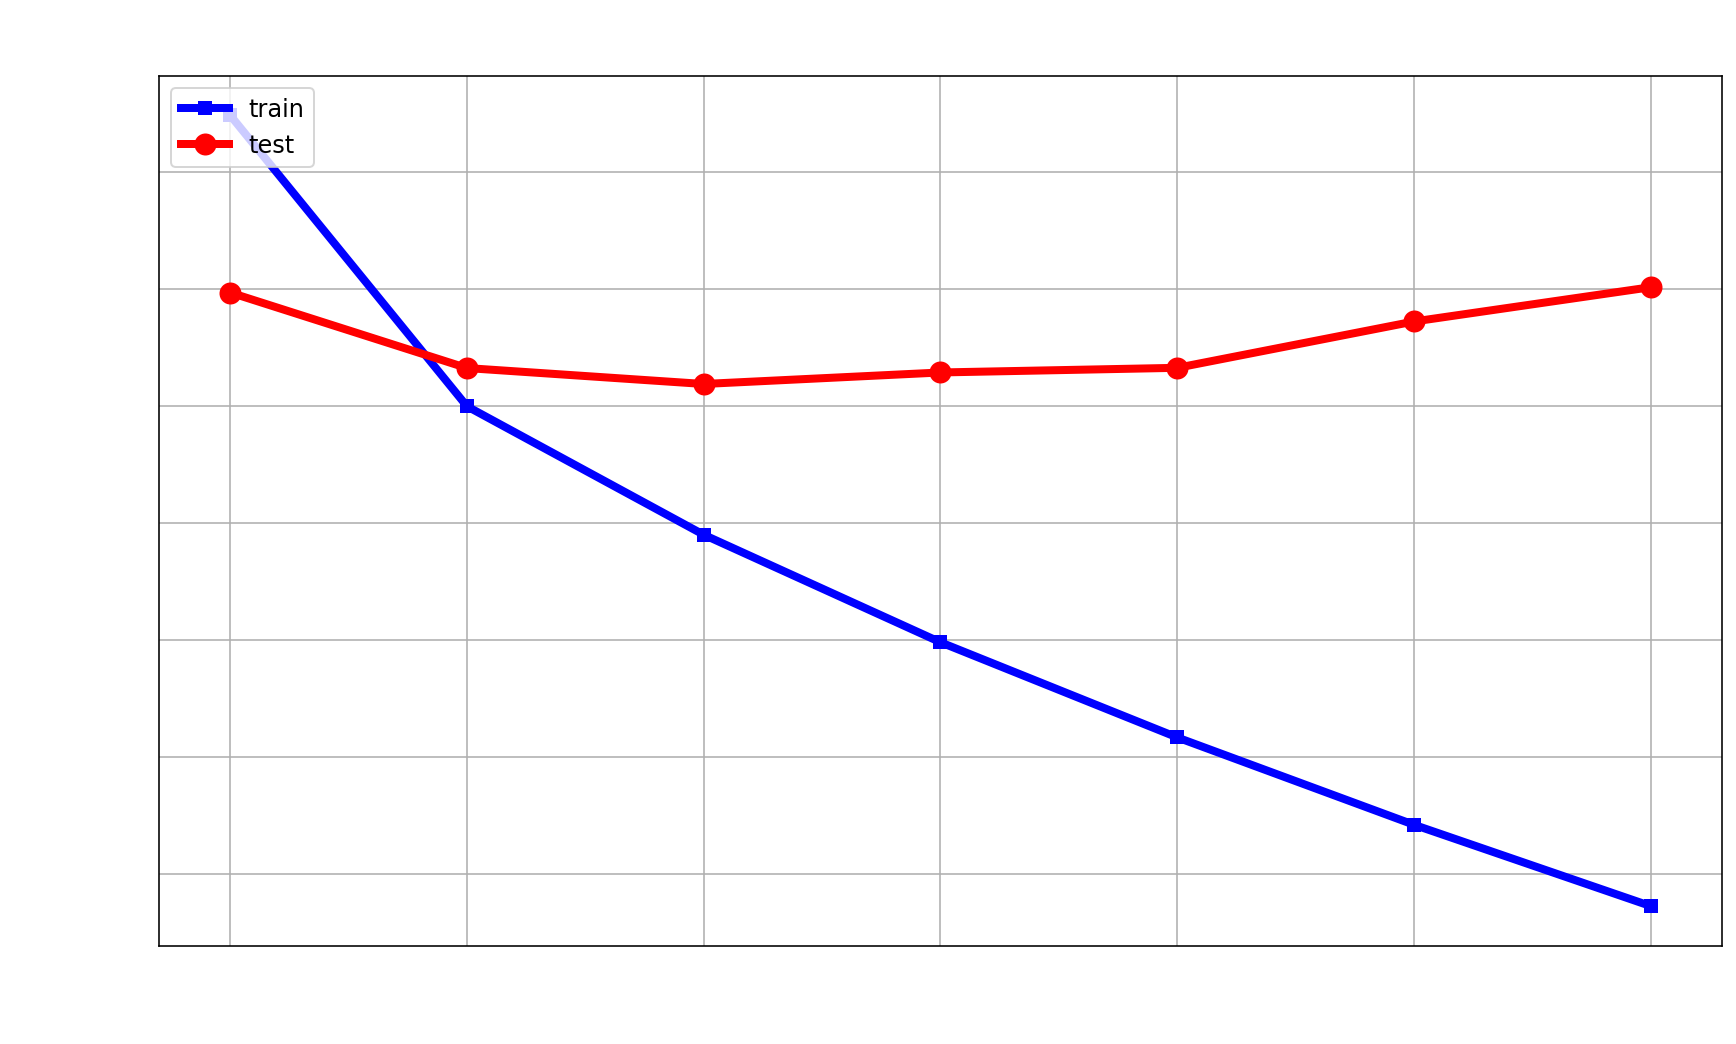

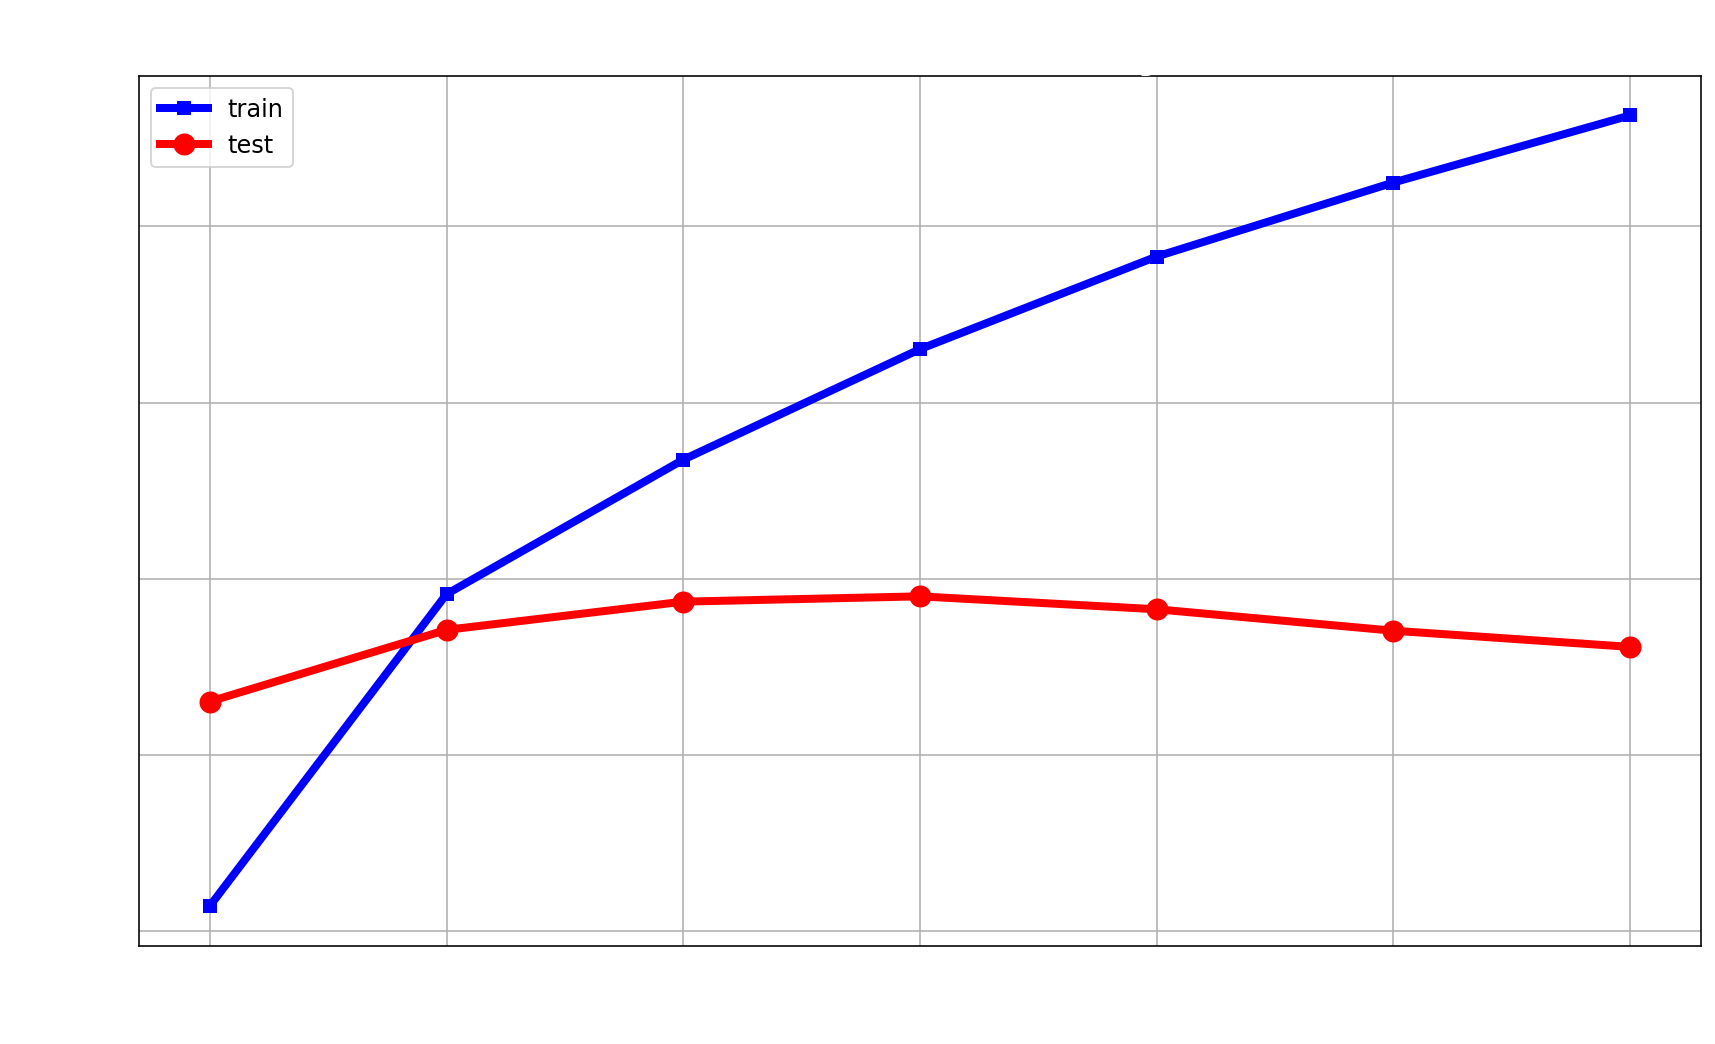

In [ ]:
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

# model loss
epochs = range(1, len(history.history['acc']) + 1)

plt.plot(epochs, history.history['loss'], c='b', marker='s')
plt.plot(epochs, history.history['val_loss'], c='r', marker='o', ms=10)

plt.title('model loss', color='white', fontsize=32)
plt.ylabel('loss', color='white', fontsize=16)
plt.xlabel('epoch', color='white', fontsize=16)

plt.tick_params(colors='white', labelsize=16)
plt.legend(['train', 'test'], loc='upper left', fontsize='large')

plt.show()

# model accuracy
epochs = range(1, len(history.history['acc']) + 1)

plt.plot(epochs, history.history['acc'], c='b', marker='s')
plt.plot(epochs, history.history['val_acc'], c='r', marker='o', ms=10)

plt.title('model accuracy', color='white', fontsize=32)
plt.ylabel('accuracy', color='white', fontsize=16)
plt.xlabel('epoch', color='white', fontsize=16)

plt.tick_params(colors='white', labelsize=16)
plt.legend(['train', 'test'], loc='upper left', fontsize='large')

plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = loaded_model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = loaded_model.predict_classes(X_test, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.855411
Precision: 0.852523
Recall: 0.861905
F1 score: 0.857188


In [ ]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.710787
ROC AUC: 0.932399
[[21073  3753]
 [ 3476 21695]]


In [ ]:
# 캐글 평가

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ko_data.csv to ko_data.csv
User uploaded file "ko_data.csv" with length 622720 bytes


In [ ]:
!ls

best_model.h5  gdrive  ko_data.csv  sample_data


In [ ]:
import io

#data = pd.read_csv('ko_data.csv', encoding='euc-kr')
#data = pd.read_csv('ko_data.csv', encoding='utf-8')
kaggle_data = pd.read_csv('ko_data.csv', encoding='cp949')

In [ ]:
kaggle_data

,Id,Sentence
0,0,정말 많이 울었던 영화입니다.
1,1,시간 낭비예요.
2,2,포스터를 저렇게밖에 만들지 못했던 제작자의 소심함에 침을 뱉고 싶다.
3,3,지금 봐도 재미있는 영화!!! 코믹과 감동!!! 그리고 요리!!!
4,4,이걸 영화로 만드는 거야?얼마나 가는지 보자.
...,...,...
11182,11182,이 영화를 커플에게 추천합니다. 영화관에 가다보면 평생 잊지 못할 추억이 하나 생길...
11183,11183,심심__ 그냥 한효주 cf
11184,11184,공감해서 눈물나는 영화. 안 보신분들이 전부 제가 울었다고 하면 의아해하실텐데 보면...
11185,11185,오토바이 신은 최고네요.


In [ ]:
# 캐글 데이터 동일 과정 반복
kaggle_data = kaggle_data.dropna(how='any')
kaggle_data['Sentence'] = kaggle_data['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

X_kaggle=[]
for sentence in kaggle_data['Sentence']:
  temp_X = []
  temp_X=okt.morphs(sentence, stem=True) # 토큰화
  temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거
  X_kaggle.append(temp_X)

In [ ]:
# 캐글 데이터 정수 인코딩
tokenizer.fit_on_texts(X_kaggle)
X_kaggle = tokenizer.texts_to_sequences(X_kaggle)

In [ ]:
# 정수 인코딩 됨을 확인
print(X_kaggle[:3])

[[10, 124, 323, 1, 5], [56, 652, 909], [452, 1128, 290, 23, 35, 2567, 6868, 3143, 3, 5257, 72]]


In [ ]:
# 인풋데이터 조정
# LSTM에 넣기 위해서는 인풋 데이터 피쳐 크기를 정해야 함
# 30으로 정함
X_kaggle = pad_sequences(X_kaggle, maxlen=max_len)

In [ ]:
# predict probabilities for kaggle set
y_kaggle_probs = loaded_model.predict(X_kaggle, verbose=0)
# predict crisp classes for test set
y_kaggle_classes = loaded_model.predict_classes(X_kaggle, verbose=0)

In [ ]:
y_kaggle_probs = y_kaggle_probs[:, 0]
y_kaggle_classes = y_kaggle_classes[:, 0]

In [ ]:
x_id = kaggle_data['Id']

In [ ]:
# 제출 CSV 파일 만들기
kaggle_result_df = pd.DataFrame({'Id': x_id, 'Predicted': y_kaggle_probs})

In [ ]:
# 데이터 프레임 작성 확인
kaggle_result_df

,Id,Predicted
0,0,0.607664
1,1,0.028911
2,2,0.360715
3,3,0.391757
4,4,0.488063
...,...,...
11182,11182,0.906924
11183,11183,0.334798
11184,11184,0.878123
11185,11185,0.923732


In [ ]:
# CSV 파일 확인
kaggle_result_df.to_csv('sample.csv', index=False, encoding='cp949') 